In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from typing import Counter

cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF']) 

In [10]:
from collections import Counter
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))


class KNN: 
    def __init__(self, k=1) -> None:
        self.k = k
    
    def fit(self, x, y):
        self.X_train = x
        self.y_train = y
    
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions
    
    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # Get Closets K samples
        k_indices = np.argsort(distances)[:self.k]

        # Extract the labels of the K nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Make predictions based on the closest k samples
        most_common = np.bincount(k_nearest_labels).argmax()
        # most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        
        return most_common

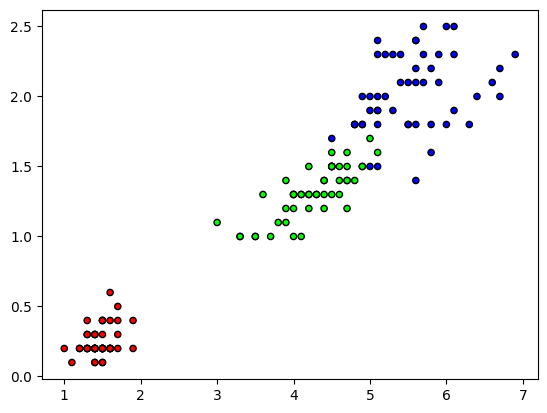

In [11]:
iris = load_iris()
# print(iris.keys())

X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

plt.figure()
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

In [12]:
clf = KNN(k=3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

predictions = [int(pred) for pred in predictions]
print(predictions)

[1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0]


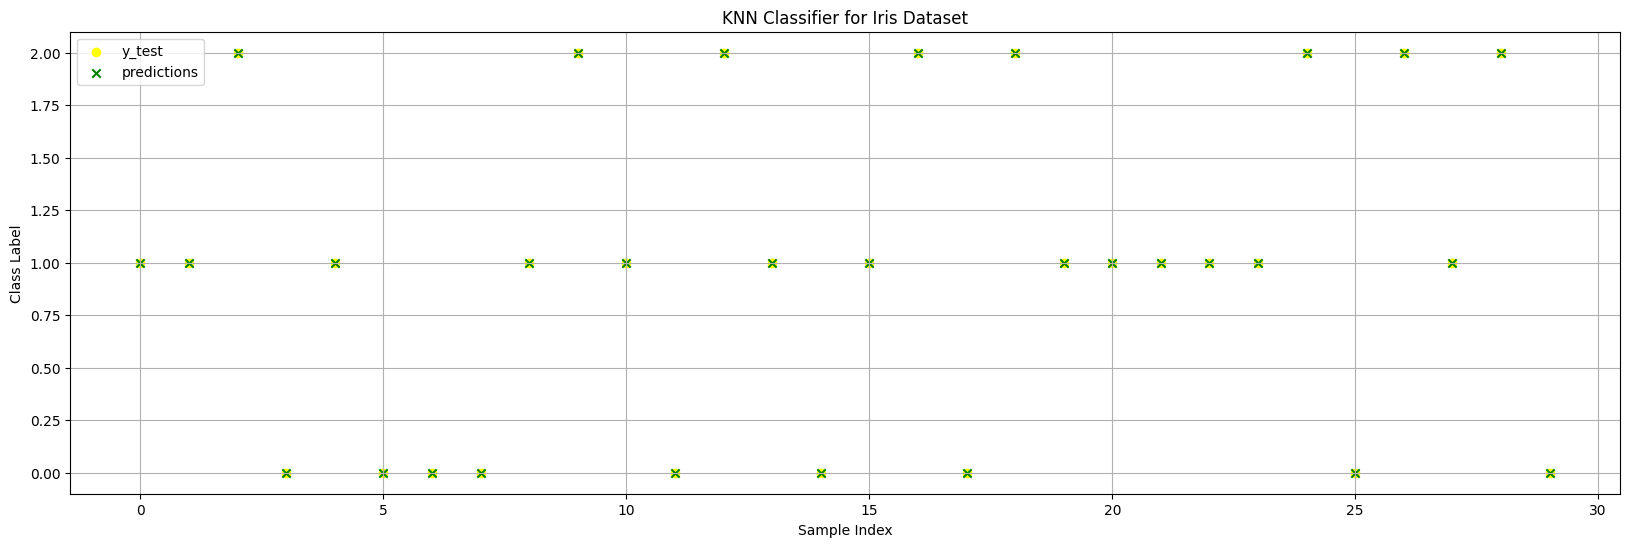

In [13]:
plt.figure(figsize=(20, 6))
plt.scatter(range(len(y_test)), y_test, color='yellow', label='y_test')
plt.scatter(range(len(predictions)), predictions, color='green', label='predictions', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('KNN Classifier for Iris Dataset')
plt.grid()
plt.legend().set_draggable(True)
plt.legend()
plt.show()

In [14]:
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9777777777777777
